In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb 

from datatile.summary.df import DataFrameSummary 

sns.set()

pd.options.mode.use_inf_as_na = True
# pd.set_option('')

In [22]:
df = pd.read_csv('data_incoming\\Data_Incoming.csv')
DataFrameSummary(df).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Row.ID,5496.0,2748.5,1586.702871,1.0,1374.75,2748.5,4122.25,5496.0,5496,5496,0,0%,numeric
Order.ID,5496.0,29967.985262,17247.41979,3.0,15043.0,29926.5,44654.75,59973.0,5496,5496,0,0%,numeric
Customer.Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5496,795,0,0%,categorical
Order.Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5496,1418,0,0%,categorical
Order.Priority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5496,5,0,0%,categorical
Order.Quantity,5496.0,25.517649,14.480022,1.0,13.0,26.0,38.0,50.0,5496,50,0,0%,numeric
Sales,5496.0,1763.818347,3645.735913,3.23,141.3675,428.0215,1648.85025,89061.05,5496,5394,0,0%,numeric
Discount,5496.0,0.049905,0.031785,0.0,0.02,0.05,0.08,0.17,5496,14,0,0%,numeric
Ship.Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5496,3,0,0%,categorical
Profit,5496.0,200.483017,1201.403204,-14140.7,-82.1625,-0.945,163.39,27220.69,5496,5253,0,0%,numeric


Since there are relatively few numerical columns , 
it is feasible to do a deep dive into each and each columnn to understand the information it captures

then we will do bivariate analyses , between numerical columns to check for correlation 


In [23]:
# numerical columns
col_list =[
    # 'Order.Quantity',
    'Sales',
    'Profit',
    'Unit.Price',
    # 'Discount'
    'Shipping.Cost',
    'Product.Base.Margin',
    ]

treating outliers is required only for plotting readable graphs

as there are slight extreme values observed in data summary ( df. describe() )

In [24]:
from ml_modules.plot_utils import treatoutliers 
df = treatoutliers(df , columns=col_list, exclusion_fraction = 0.025 , treament='cap')

## Histogram + Distribution detailed study

    make a quick histogram here of all derived parameters ,
    so that we can see whther the data is too narrow or skewed or whatever lets find out
    make a iterator , that goes through a list of all Col names from DF
    analyse the statistical parameters , make sure there not toomany , to or weird instanxces of outliers

In [25]:
colsdf = pd.DataFrame(np.array(list(zip(range(len(col_list)),col_list))))
index = 0

def desc_stats ( index ) :
    x = df[colsdf[1][index]]

    print(index)
    print(x.name)
    print( 'Mode    :  ' , x.mode()   )
    print( 'Mean    :  ' , x.mean()   )
    print( 'Std.Dev :  ' , x.std()    )
    print( 'Median  :  ' , x.median() )
    print()
    print( 'Min     :  ' , x.min()    )
    print( 'Quantile 0.1   :  ' , x.quantile(q=0.1) )
    print( 'Quantile 0.25  :  ' , x.quantile(q=0.25) )
    print( 'Quantile 0.5   :  ' , x.quantile(q=0.5) )
    print( 'Quantile 0.75  :  ' , x.quantile(q=0.75) )
    print( 'Quantile 0.9   :  ' , x.quantile(q=0.9) )
    print( 'Max     :  ' , x.max()    )
    print(np.where(df[colsdf[1][index]] == np.inf))

    print()

    plt.figure(figsize=(20,10))
    plt.rcParams['axes.facecolor'] = 'white'

    #n_bins = 200
    #fig, axs = plt.subplots( 1 , 2 , sharey=True )
    fig, axs = plt.subplots( 1 , sharey=True , figsize=(20,10)) #, tight_layout=True)

    axs = sb.distplot(x , rug=True ,kde=True ,#  bins=n_bins ,
                    rug_kws={"color": "g"},
                    kde_kws={"color": "k", "lw":1, "label": "KDE"},
                    hist_kws={"histtype": "step", "linewidth": 1,
                                "alpha": 1 , "color": "g"})
    axs = sb.kdeplot(x , bw_method=.2, label="bw: 0.2")


    axs.set_title(x.name)
    #ax.set_xticks([0,25,50,75,100])
    axs.set_xlabel(x.name)
    axs.set_ylabel('no. of instances')

    #print(axs)
    plt.show()
    
    return

-------------------------------------Sales--------------------------------------
0
Sales
Mode    :   0       14.72125
1    17406.74375
dtype: float64
Mean    :   1694.664360716885
Std.Dev :   3119.196334212604
Median  :   428.0215

Min     :   14.72125
Quantile 0.1   :   59.599999999999994
Quantile 0.25  :   141.3675
Quantile 0.5   :   428.0215
Quantile 0.75  :   1648.85025
Quantile 0.9   :   4891.219999999999
Max     :   17406.74375
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

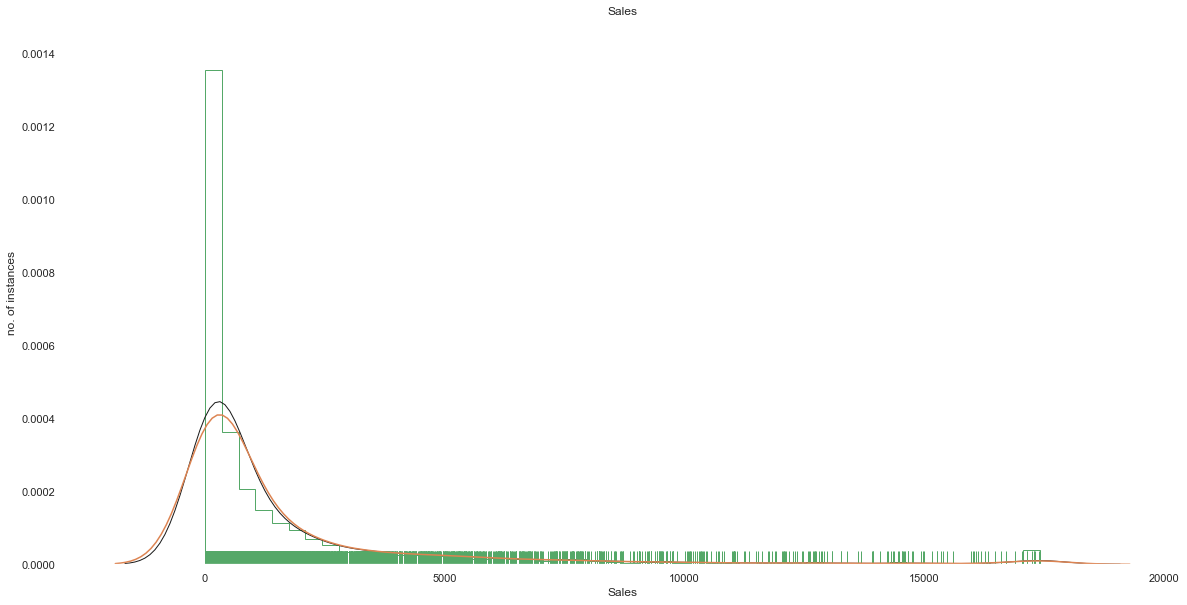

-------------------------------------Profit-------------------------------------
1
Profit
Mode    :   0   -1531.698125
1    4985.846250
dtype: float64
Mean    :   189.03699429130276
Std.Dev :   862.370743903162
Median  :   -0.945

Min     :   -1531.6981250000001
Quantile 0.1   :   -251.28
Quantile 0.25  :   -82.1625
Quantile 0.5   :   -0.945
Quantile 0.75  :   163.39
Quantile 0.9   :   764.1400000000001
Max     :   4985.8462500000005
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

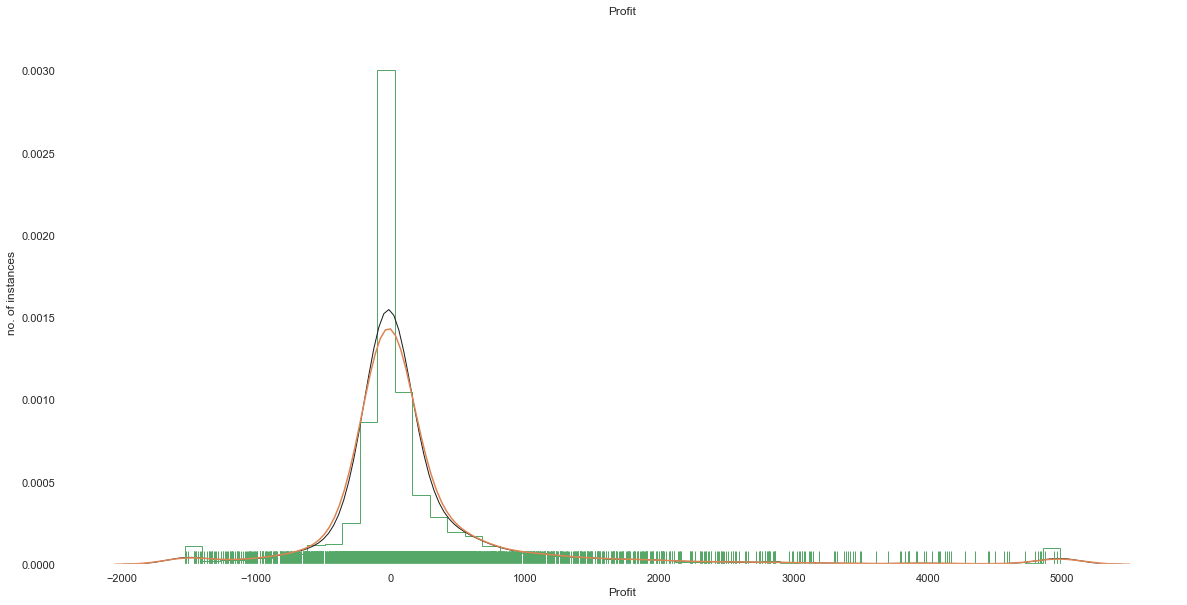

-----------------------------------Unit.Price-----------------------------------
2
Unit.Price
Mode    :   0    6.48
dtype: float64
Mean    :   71.4074308588064
Std.Dev :   115.84350394621846
Median  :   20.97

Min     :   1.76
Quantile 0.1   :   3.89
Quantile 0.25  :   6.48
Quantile 0.5   :   20.97
Quantile 0.75  :   83.1
Quantile 0.9   :   200.99
Max     :   599.99
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

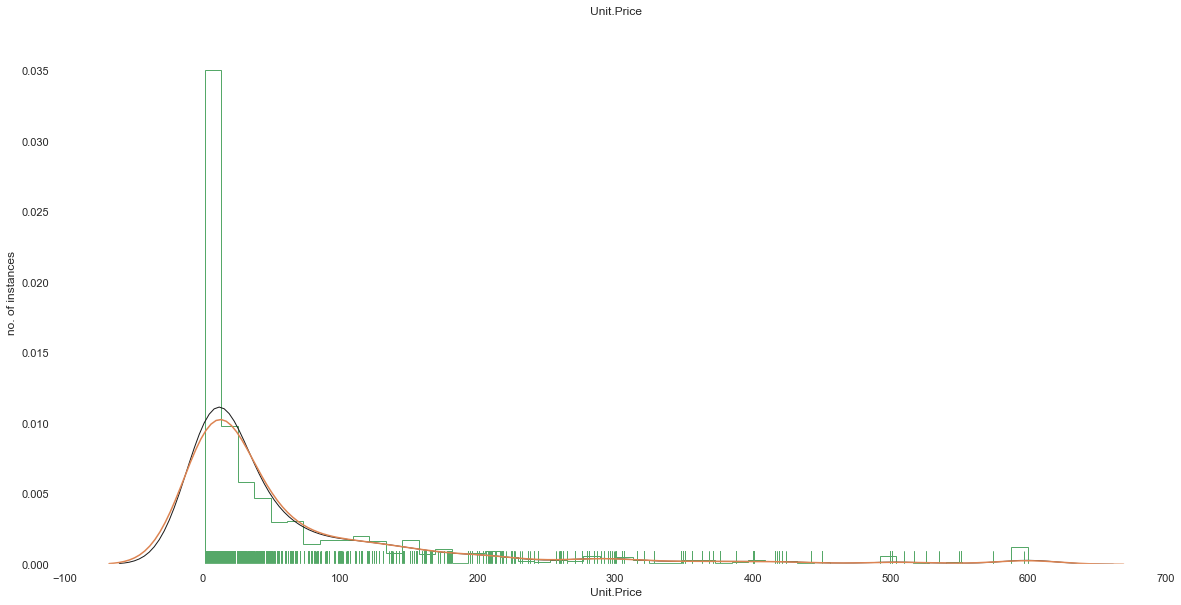

---------------------------------Shipping.Cost----------------------------------
3
Shipping.Cost
Mode    :   0    19.99
dtype: float64
Mean    :   12.596502911208152
Std.Dev :   15.946479758979416
Median  :   6.07

Min     :   0.5
Quantile 0.1   :   1.35
Quantile 0.25  :   3.3525
Quantile 0.5   :   6.07
Quantile 0.75  :   14.0
Quantile 0.9   :   35.0
Max     :   69.64
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

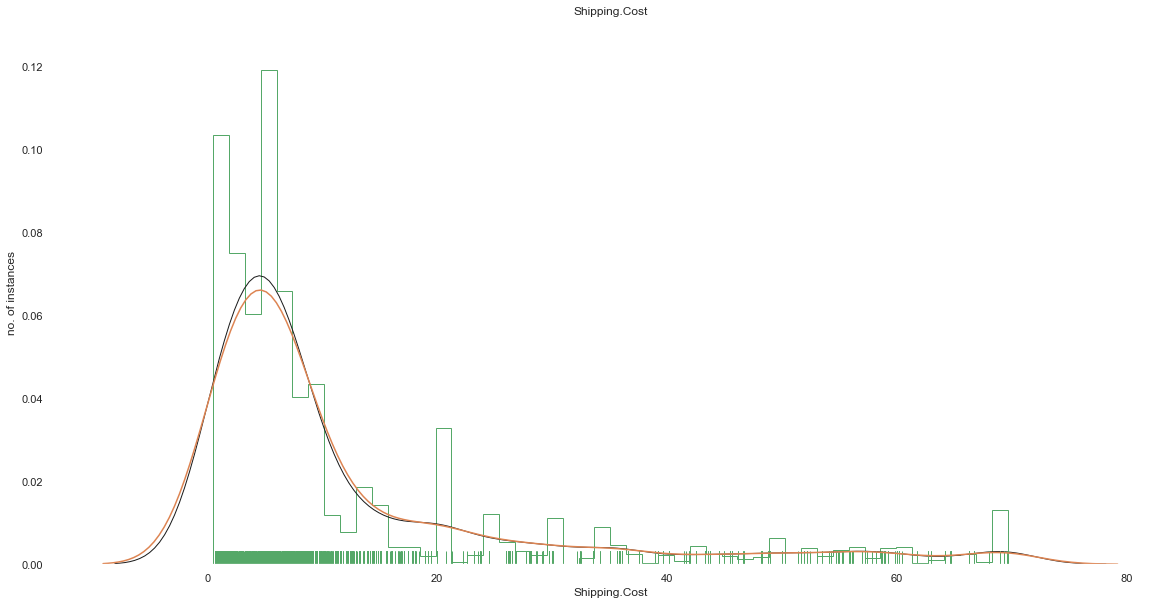

------------------------------Product.Base.Margin-------------------------------
4
Product.Base.Margin
Mode    :   0    0.37
dtype: float64
Mean    :   0.5027183406113537
Std.Dev :   0.1321837224703811
Median  :   0.49

Min     :   0.35
Quantile 0.1   :   0.36
Quantile 0.25  :   0.38
Quantile 0.5   :   0.49
Quantile 0.75  :   0.59
Quantile 0.9   :   0.69
Max     :   0.82
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

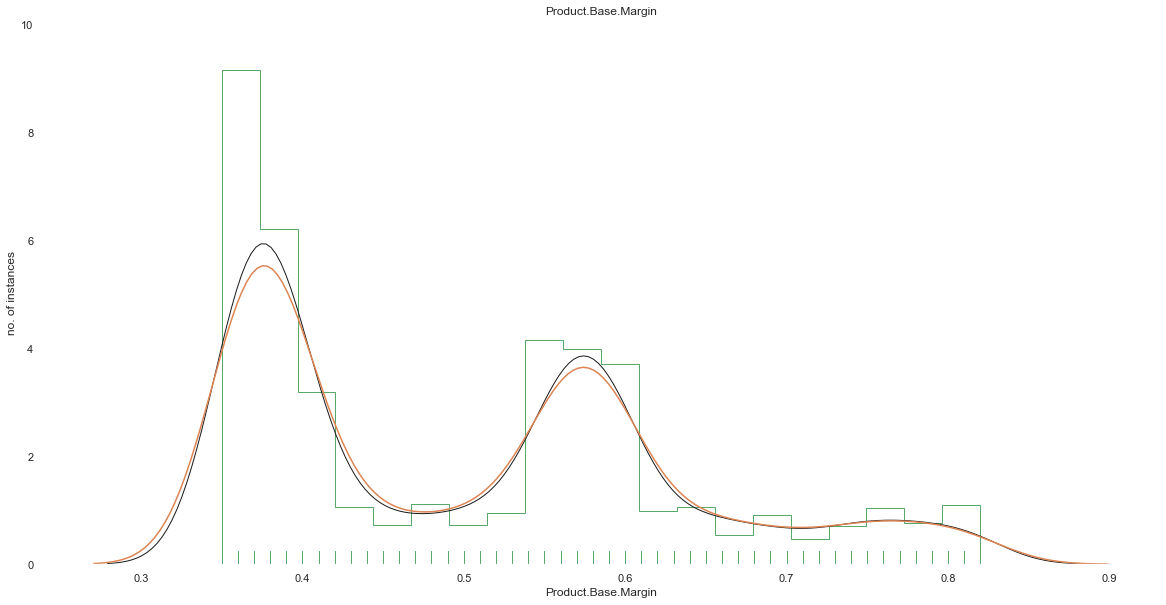

In [26]:
for i in range(len(col_list)):
    print( str(col_list[i]).center(80,'-'))
    desc_stats ( i )

----

## Correlation

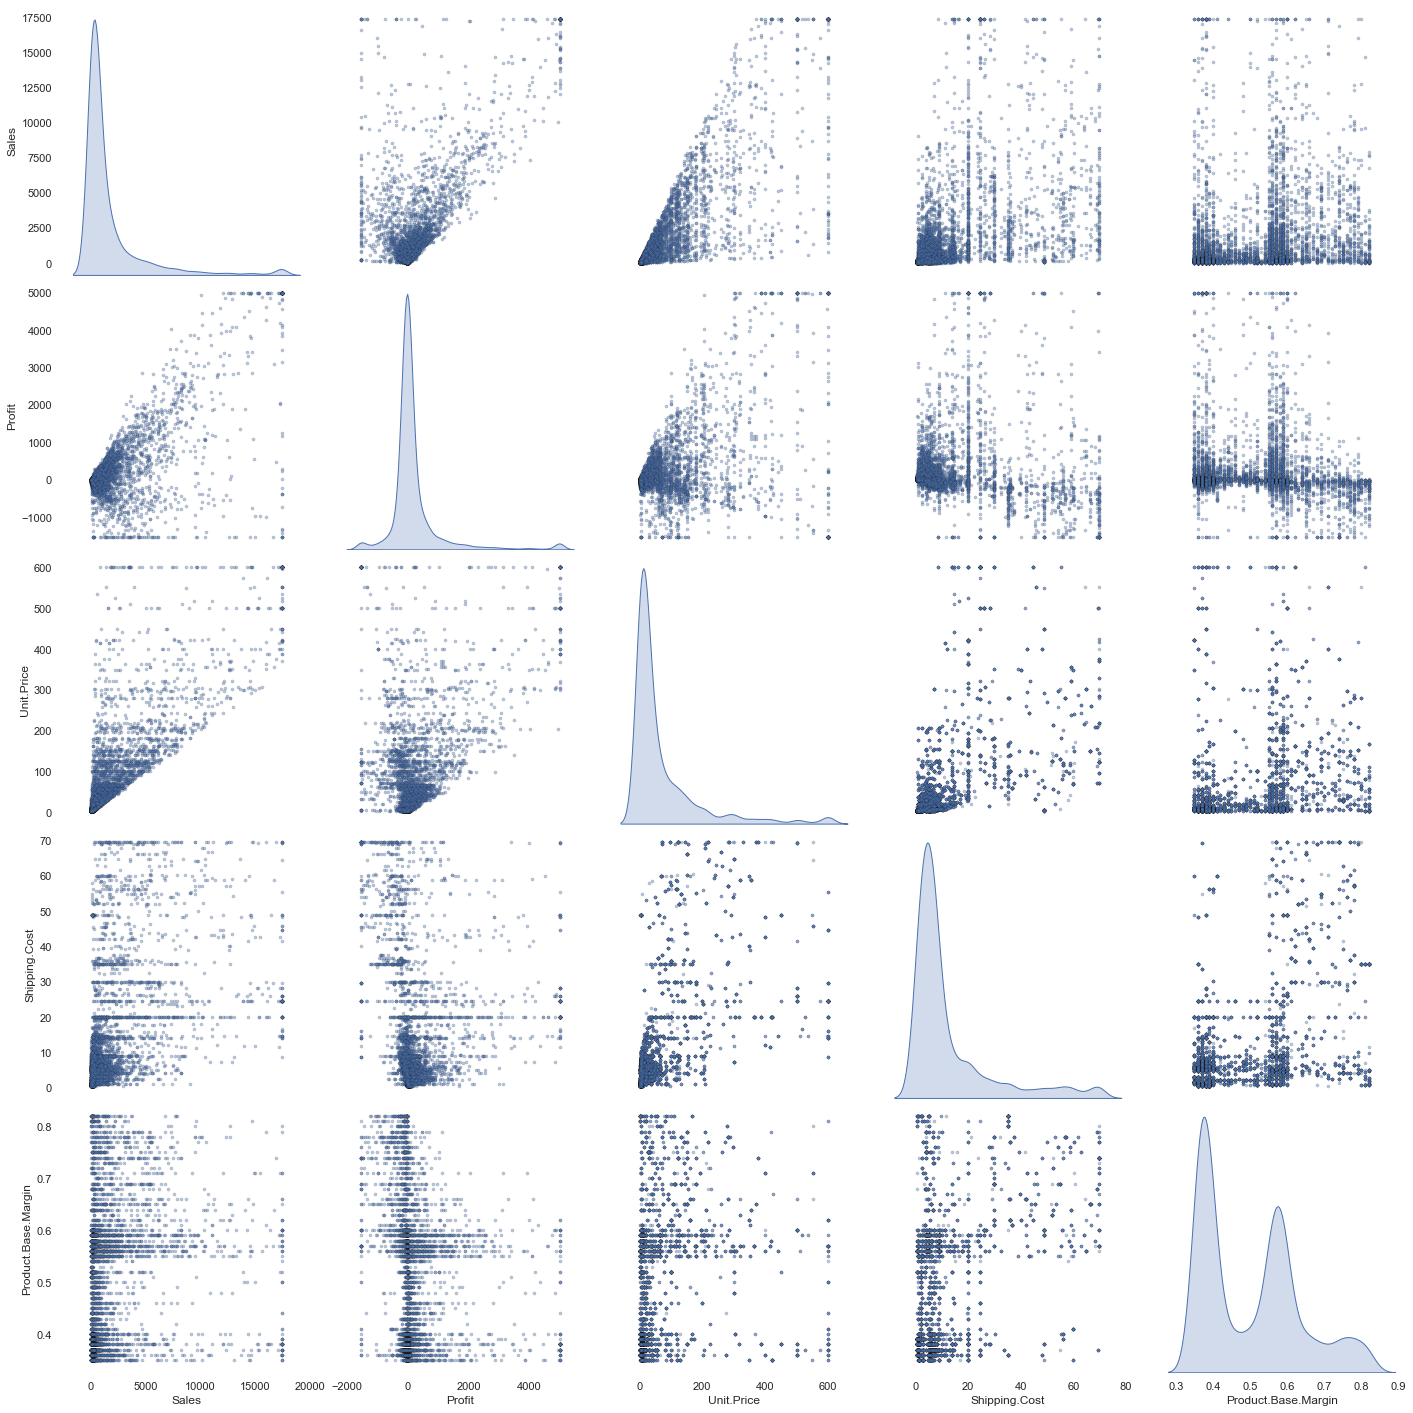

In [27]:
sb.pairplot(df[col_list], 
             #hue = 'old_phase_country', 
            
             diag_kind = 'kde', # 'hist'
             #plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             plot_kws = {'alpha': 0.4, 's': 10 , 'edgecolor': 'k'},
             diag_kws = {#'bins': 50 ,
                         #'histtype':'barstacked' ,
                         #'stacked': False 
                        },
             height = 4
             )